In [9]:
import numpy
import pandas as pd
from numpy import arange
from numpy import set_printoptions
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
df = pd.read_csv("housing (task4).csv")
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [11]:
filename = "housing (task4).csv"
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO',
         'B','LSTAT','MEDV']
dataset = read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names)
dataset = dataset.dropna()
dataset.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


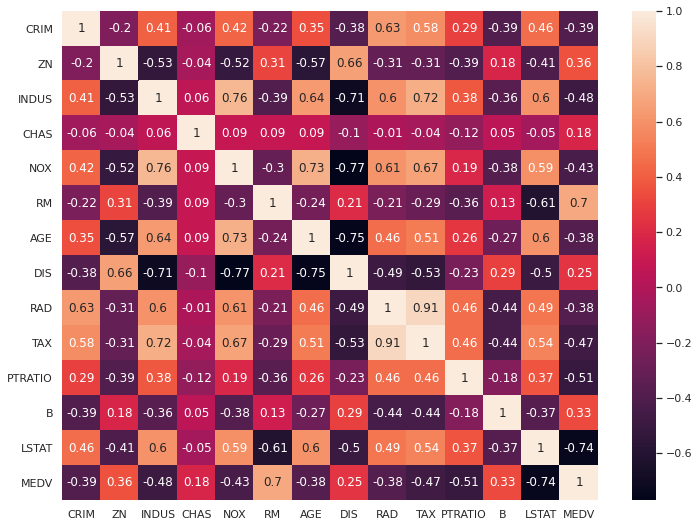

In [12]:
correlation_matrix = dataset.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix, annot=True)

In [13]:
array = dataset.values
X = array[:,0:13]
Y = array[:,13]

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
rX = scaler.fit_transform(X)
set_printoptions(precision=5)
print(rX[0:1,:])

[[0.      0.18    0.06782 0.      0.31481 0.57751 0.64161 0.2692  0.
  0.20802 0.28723 1.      0.08968]]


In [15]:
scaler = StandardScaler().fit(X)
rX = scaler.transform(X)
set_printoptions(precision=4)
print(rX[0:1,:])

[[-0.4198  0.2848 -1.2879 -0.2726 -0.1442  0.4137 -0.12    0.1402 -0.9828
  -0.6666 -1.459   0.4411 -1.0756]]


In [16]:
validation_size = 0.20
seed = 5
X_train,X_validation,Y_train,Y_validation = train_test_split(rX,Y,
                                                             test_size = validation_size, random_state=seed)

In [17]:
num_folds = 3
seed = 1
scoring = 'r2'

In [19]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(
      model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
  print(msg)
  


LR: 0.705660 (0.009403)
LASSO: 0.646701 (0.028531)
EN: 0.623050 (0.023667)
KNN: 0.679231 (0.032894)
CART: 0.709447 (0.077927)
SVR: 0.576142 (0.027511)


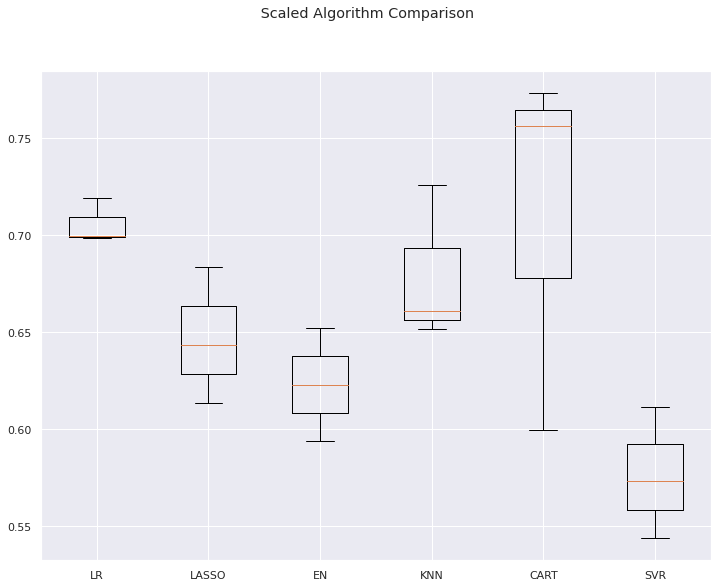

In [25]:
fig = pyplot.figure()
fig.suptitle(' Scaled Algorithm Comparison')
ax = fig.add_subplot()
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [23]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, Y_train)

predictions = model.predict(X_validation)
print(r2_score(Y_validation, predictions))

0.6176722128566061


As you can see my model could come to about 61.76 % accuracy

In [24]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(r2_score(Y_validation, predictions))

0.880796105899312


In [ ]:
Similarly my model could reach upto 88.07% accuracy